<a href="https://colab.research.google.com/github/HimanshuSahoo/Python-for-Data-Scientist/blob/main/Ass_Decision_Tree_Company_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [4]:
data.Sales.min()

0.0

In [5]:
data.Sales.max()

16.27

In [6]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [7]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.Sales.median()

7.49

In [9]:
# Create new column sale for categorize the sales as high and low
cut_labels = ['Low','Medium','High']
cut_bins = [-1,5.66,12,17]
data['sale'] = pd.cut(data['Sales'], bins=cut_bins, labels=cut_labels)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Medium
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


In [10]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sale           0
dtype: int64

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [12]:
data['ShelveLoc'] = label_encoder.fit_transform(data['ShelveLoc'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['US'] = label_encoder.fit_transform(data['US'])

In [13]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,Medium
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Medium


In [14]:
# Declaring feature and target
x = data.drop(['sale'],axis=1)
y = data['sale']

In [15]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [16]:
# Normalization factor
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [17]:
x = norm_func(x)
x

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,0.5,0.145455,0.500,1.0,1.0
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,1.0,0.545455,0.125,0.0,1.0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,1.0,0.272727,1.000,1.0,1.0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0.0,0.454545,0.250,1.0,1.0


In [18]:
y

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: sale, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [19]:
# splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [20]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=10)
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

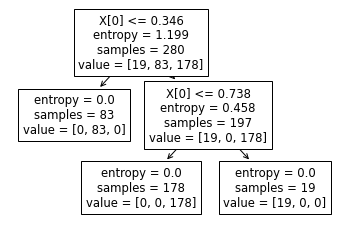

In [21]:
#plot the decision tree
tree.plot_tree(model);

In [22]:
# predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

Medium    84
Low       28
High       8
dtype: int64

In [23]:
preds

array(['Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Low', 'Medium', 'Medium', 'High', 'Medium',
       'Low', 'Medium', 'High', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'Med

In [24]:
# Getting the 2-way crosstable to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,High,Low,Medium
sale,,,
Low,0,28,1
Medium,0,0,83
High,8,0,0


In [25]:
#Accuracy
np.mean(preds==y_test)

0.9916666666666667